In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df_train=pd.read_csv("2021_zeta-disease_training-data_take-home-challenge_train.csv")
df_train.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


# Exploratory Data Analysis

In [3]:
df_train.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [5]:
df_train.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

(9.5, -0.5)

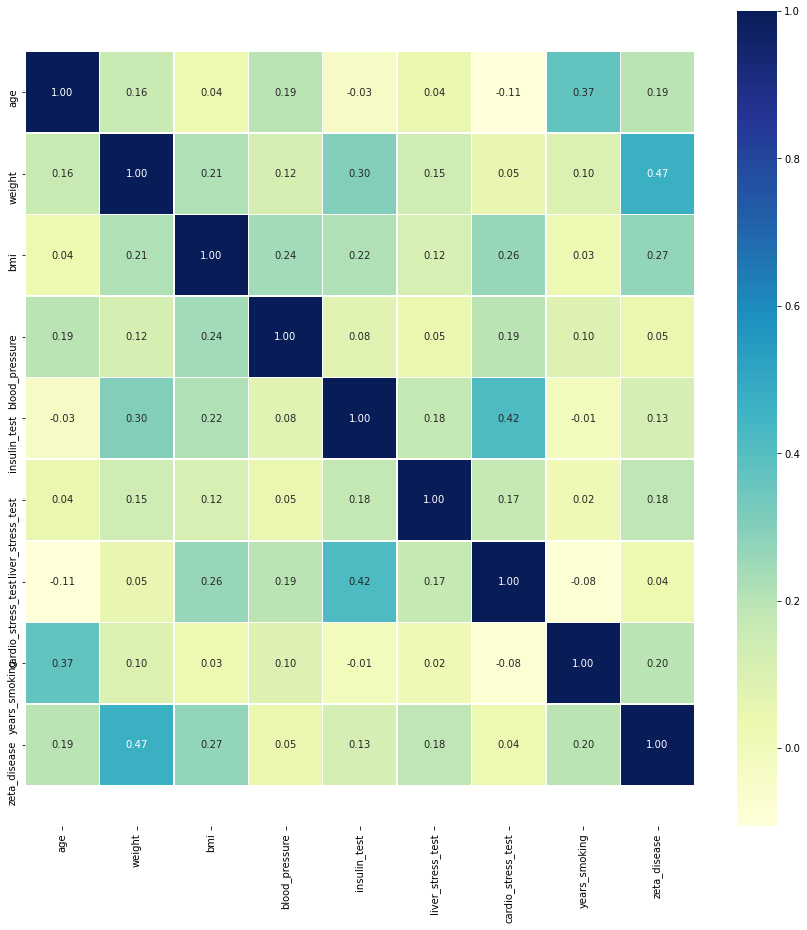

In [6]:

corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [7]:
df_train.zeta_disease.value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

Disease samples are more than half of Healthy samples, this is imbalanced dataset. Considering the disease prediction, the false nagative is more important than false positive

<Figure size 432x288 with 0 Axes>

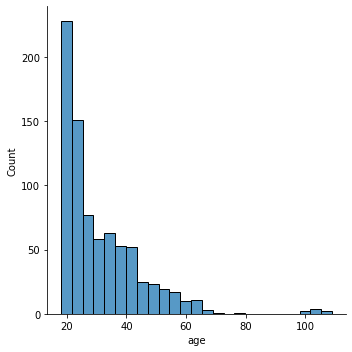

<Figure size 432x288 with 0 Axes>

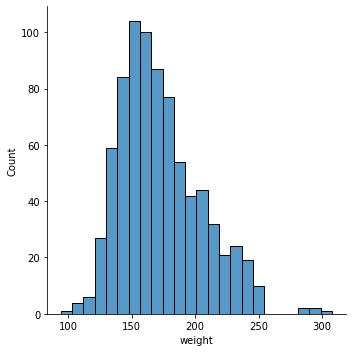

<Figure size 432x288 with 0 Axes>

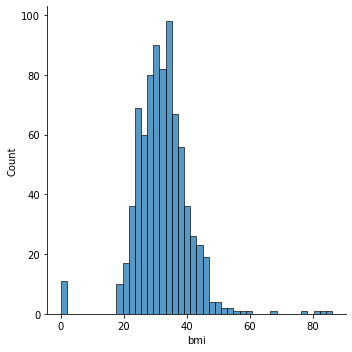

<Figure size 432x288 with 0 Axes>

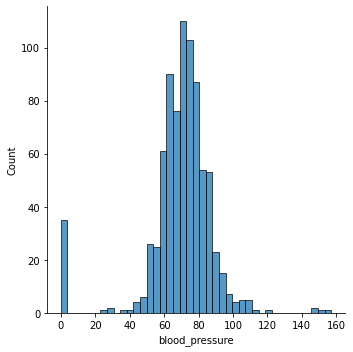

<Figure size 432x288 with 0 Axes>

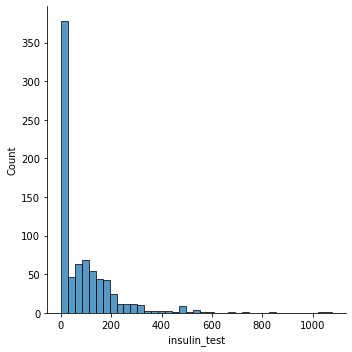

<Figure size 432x288 with 0 Axes>

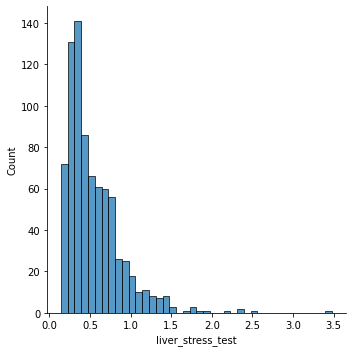

<Figure size 432x288 with 0 Axes>

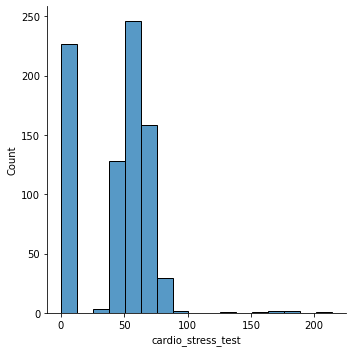

<Figure size 432x288 with 0 Axes>

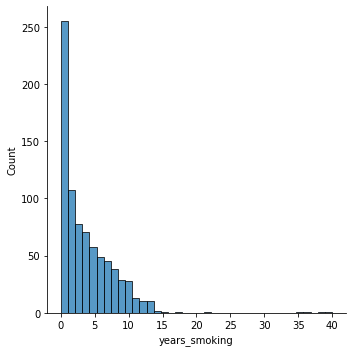

<Figure size 432x288 with 0 Axes>

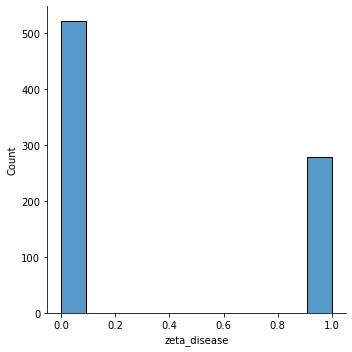

In [8]:
# check variable distribution
for column in df_train.columns:
    plt.figure()            
    sns.displot(df_train[column])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio_stress_test'>

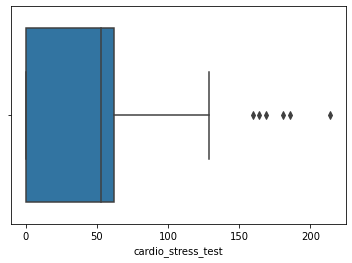

In [9]:
sns.boxplot(df_train['cardio_stress_test'])

##### Based on distribution plots, age, insulin_test, liver_stress_test, cardio_stress_test, years_smoking are not Guassian distribution, weight, bmi, blood_pressure are Guassian distribution. As for cardio_stress_test, boxplot shows it has significant amount of low values as outliers.
##### 1 Standardizaiton: Weight, BMI, Blood_pressure, Cardio_stress_Test
##### 2 Normalization: age, insulin_test, liver_stress_test, years_smoking



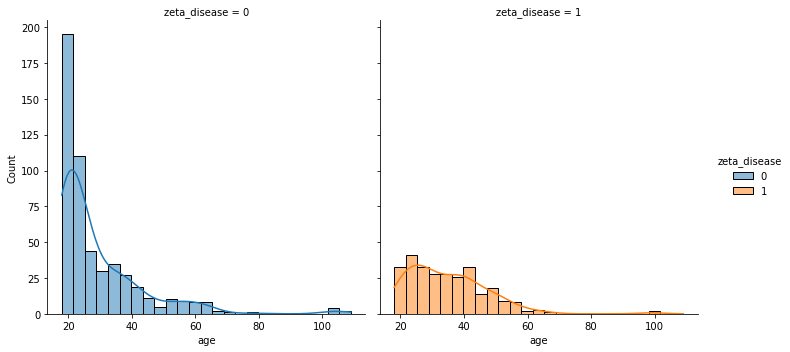

In [10]:
sns.displot(data=df_train, x='age',hue='zeta_disease', col='zeta_disease',kde=True)

It appears that more younger persons don't have zeta_disease. Both distribution is right skewed distribution. Mass of distribution is on the left of the figure

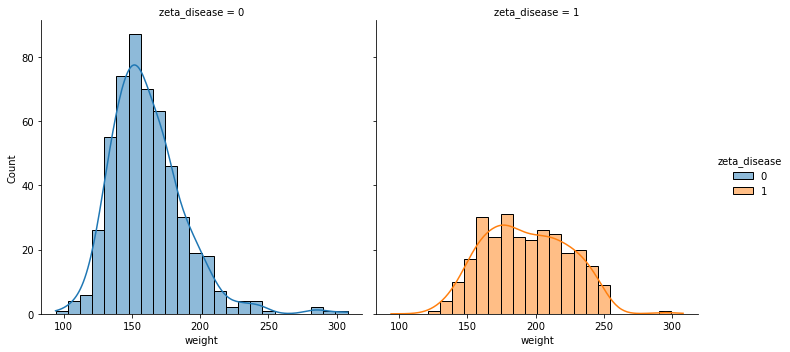

In [11]:
sns.displot(data=df_train, x='weight',hue='zeta_disease', col='zeta_disease',kde=True)

As for weight, the healthy group weight are centered close to 150 lb, while unhealthy group has weight more centered close 200 lb. Based on the sample, more healthy people have less weight compared with zeta_disease patient

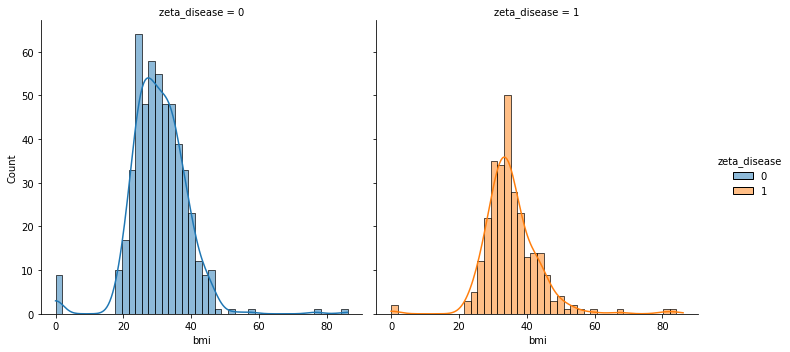

In [12]:
sns.displot(data=df_train, x='bmi',hue='zeta_disease', col='zeta_disease',kde=True)

BMI seem to be normally distributed on the training samples, no matter it's for healthy group or non-healthy group

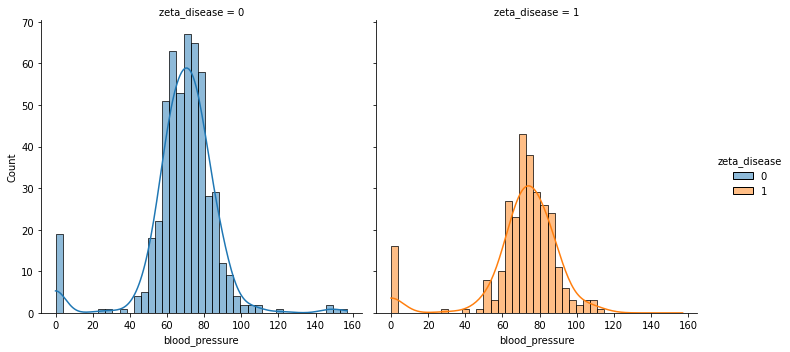

In [13]:
sns.displot(data=df_train, x='blood_pressure',hue='zeta_disease', col='zeta_disease',kde=True)

Except for several outliers, Blood Pressure also seem to be normally distributed on the training samples, no matter it's healthy group or non healthy group

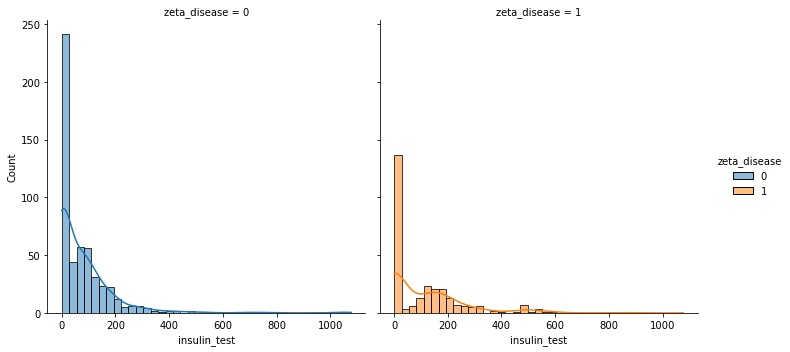

In [14]:
sns.displot(data=df_train, x='insulin_test',hue='zeta_disease', col='zeta_disease',kde=True)

Insulin_test shows right-tailed distributuion, majority of the healthy and non healthy group has the insulin test value less than 28. Based on the website https://www.portea.com/labs/diagnostic-tests/insulin-fasting-test-225/, that belong to normal range. 

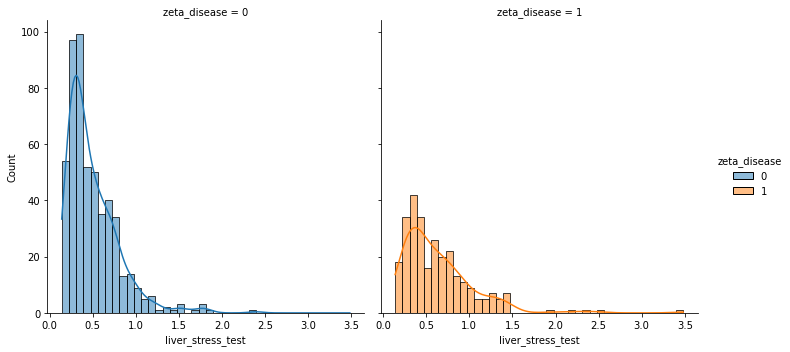

In [15]:
sns.displot(data=df_train, x='liver_stress_test',hue='zeta_disease', col='zeta_disease',kde=True)

liver_stress_test distribution seem to be similar among healthy and non-healthy group

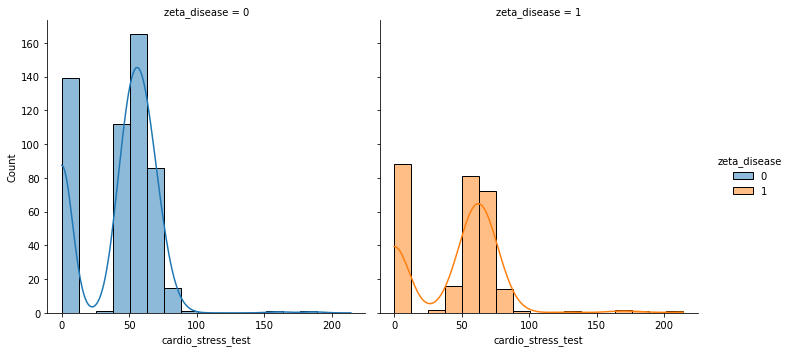

In [16]:
sns.displot(data=df_train, x='cardio_stress_test',hue='zeta_disease', col='zeta_disease',kde=True)

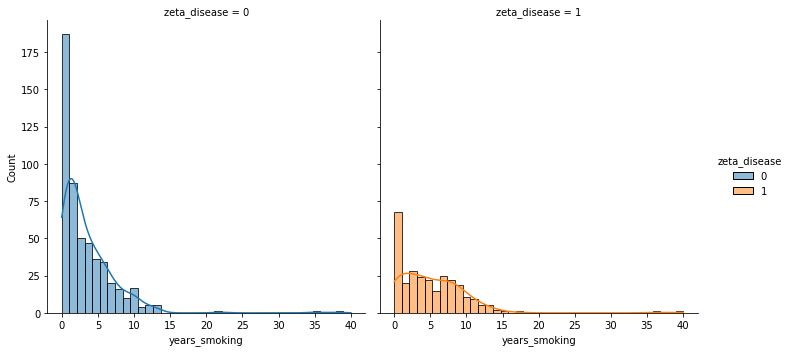

In [17]:
sns.displot(data=df_train, x='years_smoking',hue='zeta_disease', col='zeta_disease',kde=True)

Years_smoking distrubtion is slightly different between healthy and non-healthy group. Majority of healthy people has less than 2 years smoking or zero smoking experience

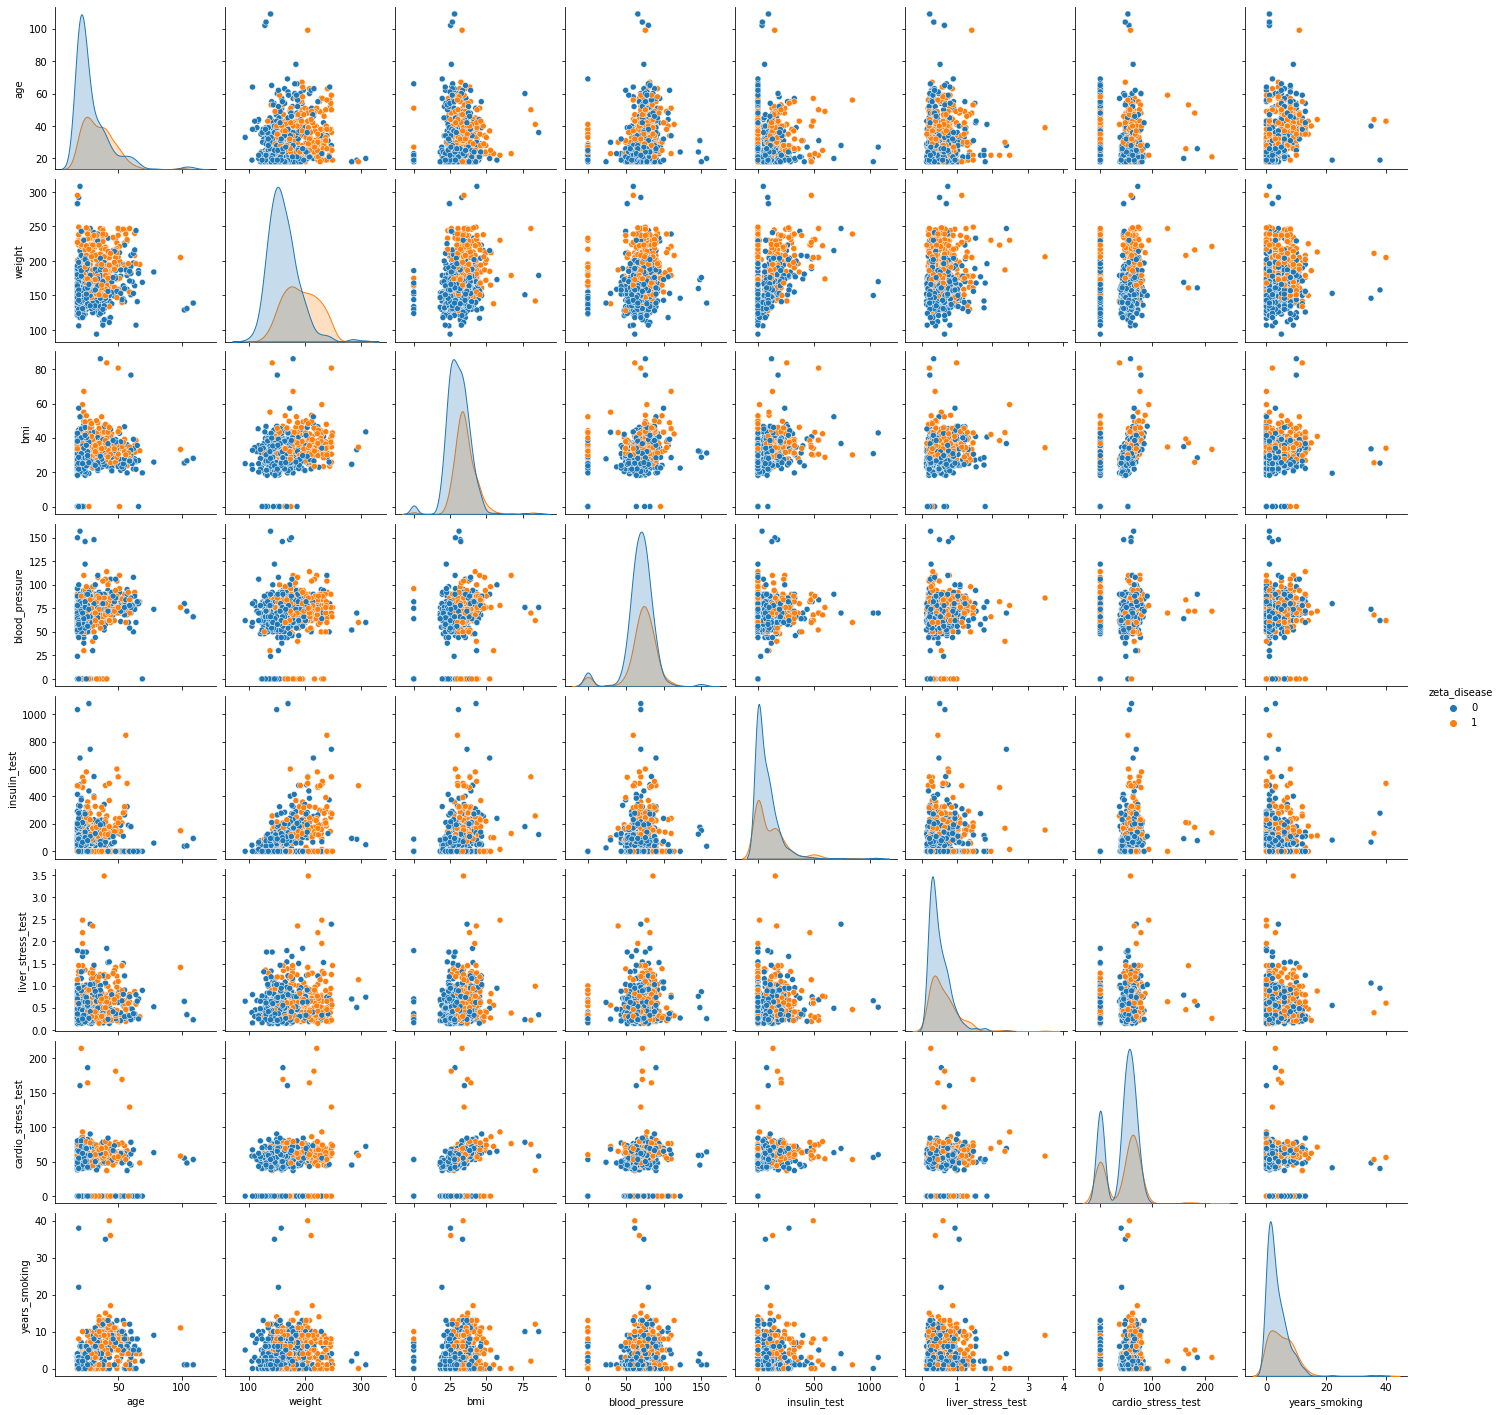

In [18]:
sns.pairplot(df_train,hue="zeta_disease")
plt.show()

# Modeling

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTE
from numpy import sqrt, argmax
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import pickle

# Statsmodels Logistic Regression

In [20]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

ss=StandardScaler()
mm=MinMaxScaler()
stand_var = ['weight', 'bmi', 'blood_pressure', 'cardio_stress_test']
norm_var = ['age', 'insulin_test', 'liver_stress_test', 'years_smoking']
X_std=ss.fit_transform(X[stand_var])
X_nom=mm.fit_transform(X[norm_var])
X_std_df=pd.DataFrame(X_std,columns=stand_var)
X_nom_df=pd.DataFrame(X_nom,columns=norm_var)
X_trans=pd.concat([X_std_df, X_nom_df], axis=1)
X_trans

,weight,bmi,blood_pressure,cardio_stress_test,age,insulin_test,liver_stress_test,years_smoking
0,0.519775,-0.597114,0.525366,-1.418885,0.395604,0.000000,0.408023,0.250
1,-0.701935,0.737186,-0.078792,0.390865,0.054945,0.065924,0.073642,0.050
2,0.425797,-0.269391,1.028831,-1.418885,0.318681,0.000000,0.039515,0.175
3,-0.701935,-0.164052,0.021901,0.423769,0.000000,0.959146,0.155366,0.000
4,-0.388676,0.023219,0.223287,0.522483,0.065934,0.116063,0.185601,0.050
...,...,...,...,...,...,...,...,...
795,-0.357350,-0.444957,1.028831,-0.036894,0.087912,0.072423,0.124832,0.075
796,-0.232047,0.175376,-0.481564,0.851529,0.208791,0.000000,0.049993,0.150
797,-0.200721,-0.772679,0.223287,-1.418885,0.098901,0.000000,0.036821,0.125
798,-1.046520,-0.480070,-0.179485,0.325056,1.000000,0.087279,0.026643,0.025


In [21]:
logit_model=sm.Logit(y,X_trans)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.527540
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           zeta_disease   No. Observations:                  800
Model:                          Logit   Df Residuals:                      792
Method:                           MLE   Df Model:                            7
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.1842
Time:                        09:11:05   Log-Likelihood:                -422.03
converged:                       True   LL-Null:                       -517.34
Covariance Type:            nonrobust   LLR p-value:                 1.116e-37
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
weight                 1.2830      0.111     11.550      0.000       1.065       1.501
bmi  

##### Among the eight varialbes, weight, bmi, insulin_test P Values are significantly less than 0.05. They are important features for predictor

# Predictive Modeling

In [22]:
def print_score (clf_nm, clf, X_test, y_test, threshold, threshold_aj=True):
    
    #if train==True and threshold_aj==False:
    '''
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:",clf_nm,"\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Auc_Ruc_Score:\n{roc_auc_score(y_test,pred)* 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    '''
    
    if threshold_aj==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:",clf_nm,"\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")  
        print(f"Roc_Auc_Score:\n{roc_auc_score(y_test,pred)* 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        
    elif threshold_aj==True:
        predicted_prob = clf.predict_proba(X_test)
        pred=(predicted_prob[:,1]>=threshold).astype('int')
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:",clf_nm,"\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")  
        print(f"Roc_Auc_Score:\n{roc_auc_score(y_test,pred)* 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

# Logistic Regression

In [23]:
df_train.columns

Index(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'],
      dtype='object')

In [24]:
# feature scaling, basedon each variable distribution
stand_var = ['weight', 'bmi', 'blood_pressure', 'cardio_stress_test']
stand_transformer = Pipeline(steps=[('standard', StandardScaler())])
norm_var = ['age', 'insulin_test', 'liver_stress_test', 'years_smoking']
norm_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

In [25]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

feature_preprocess= ColumnTransformer(transformers=
 [('standard', stand_transformer, stand_var),
 ('norm', norm_transformer, norm_var)])


log_clf = Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ('classifier', LogisticRegression(solver='liblinear'))])

log_clf.fit(X_train, y_train)

Pipeline(steps=[('feature_preprocess',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['weight', 'bmi',
                                                   'blood_pressure',
                                                   'cardio_stress_test']),
                                                 ('norm',
                                                  Pipeline(steps=[('norm',
                                                                   MinMaxScaler())]),
                                                  ['age', 'insulin_test',
                                                   'liver_stress_test',
                                                   'years_smoking'])])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [26]:
print_score("Logistic Regression",log_clf, X_test, y_test,0.5,threshold_aj=False)

Test Result: Logistic Regression 
Accuracy Score: 76.25%
_______________________________________________
Roc_Auc_Score:
72.66%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.800000   0.680000    0.7625    0.740000      0.758000
recall       0.846154   0.607143    0.7625    0.726648      0.762500
f1-score     0.822430   0.641509    0.7625    0.731970      0.759108
support    104.000000  56.000000    0.7625  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[88 16]
 [22 34]]



In [27]:
pipeline = Pipeline([('feature_preprocess', feature_preprocess),
                       ('logreg',LogisticRegression())])

params = {"logreg__C": np.logspace(-4, 4, 10),
          "logreg__solver": ["liblinear",'lbfgs'],
          "logreg__penalty":['l1','l2']}

#lr_clf = LogisticRegression()

lr_cv = GridSearchCV(pipeline, params, scoring="roc_auc", n_jobs=-1, verbose=1, cv=3)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
#lr_clf = LogisticRegression(**best_params)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters: {'logreg__C': 21.54434690031882, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty,

In [68]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


log_clf_bt = Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ('classifier', LogisticRegression(solver='liblinear',penalty='l2',C=21.54))])

log_clf_bt.fit(X_train, y_train)

print_score("Hyperparamter Tuned Logistic Regression",log_clf_bt, X_test, y_test,0.5,threshold_aj=False)

Test Result: Hyperparamter Tuned Logistic Regression 
Accuracy Score: 76.88%
_______________________________________________
Roc_Auc_Score:
72.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.796460   0.702128   0.76875    0.749294      0.763444
recall       0.865385   0.589286   0.76875    0.727335      0.768750
f1-score     0.829493   0.640777   0.76875    0.735135      0.763442
support    104.000000  56.000000   0.76875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[90 14]
 [23 33]]



In [69]:
test_score = roc_auc_score(y_test, log_clf_bt.predict(X_test)) * 100
train_score = roc_auc_score(y_train, log_clf_bt.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training ROC AUC Score', 'Testing ROC AUC Score'])
tuning_results_df


,Model,Training ROC AUC Score,Testing ROC AUC Score
0,Tuned Logistic Regression,73.183964,72.733516


# Support Vector Machine

In [30]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [31]:
svm_clf=Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ("svm",SVC(kernel='rbf', gamma=0.1, C=1.0))])
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('feature_preprocess',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  ['weight', 'bmi',
                                                   'blood_pressure',
                                                   'cardio_stress_test']),
                                                 ('norm',
                                                  Pipeline(steps=[('norm',
                                                                   MinMaxScaler())]),
                                                  ['age', 'insulin_test',
                                                   'liver_stress_test',
                                                   'years_smoking'])])),
                ('svm', SVC(gamma=0.1))])

In [32]:
print_score("SVM RBF Kernel",svm_clf,X_test, y_test,0.5,threshold_aj=False)

Test Result: SVM RBF Kernel 
Accuracy Score: 76.88%
_______________________________________________
Roc_Auc_Score:
72.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.791304   0.711111   0.76875    0.751208      0.763237
recall       0.875000   0.571429   0.76875    0.723214      0.768750
f1-score     0.831050   0.633663   0.76875    0.732357      0.761965
support    104.000000  56.000000   0.76875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[91 13]
 [24 32]]



In [33]:
pipeline = Pipeline([('feature_preprocess', feature_preprocess),
                       ('svmclf',SVC())])

params = {"svmclf__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "svmclf__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "svmclf__kernel":('linear', 'poly', 'rbf')}

#lr_clf = LogisticRegression()

svm_cv = GridSearchCV(pipeline, params, scoring="roc_auc", n_jobs=-1, verbose=1, cv=3)
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 147 candidates, totalling 441 fits
Best parameters: {'svmclf__C': 20, 'svmclf__gamma': 0.001, 'svmclf__kernel': 'linear'}


In [34]:
svm_clf_bt=Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ("svm",SVC(kernel='linear', gamma=0.001, C=20))])
svm_clf_bt.fit(X_train,y_train)

print_score("Hyperparameter Tuned SVM Linear Kernel",svm_clf_bt,X_test, y_test,0.5,threshold_aj=False)

Test Result: Hyperparameter Tuned SVM Linear Kernel 
Accuracy Score: 76.88%
_______________________________________________
Roc_Auc_Score:
73.15%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.801802   0.693878   0.76875    0.747840      0.764028
recall       0.855769   0.607143   0.76875    0.731456      0.768750
f1-score     0.827907   0.647619   0.76875    0.737763      0.764806
support    104.000000  56.000000   0.76875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[89 15]
 [22 34]]



In [70]:
test_score = roc_auc_score(y_test, svm_clf_bt.predict(X_test)) * 100
train_score = roc_auc_score(y_train, svm_clf_bt.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training ROC AUC Score', 'Testing ROC AUC Score'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training ROC AUC Score,Testing ROC AUC Score
0,Tuned Logistic Regression,73.183964,72.733516
1,Tuned Support Vector Machine,73.303868,73.145604


There is no significant accuracy increase in ROC AUC score from hyperparameter tuned SVM

# Decision Tree

In [36]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

tree_clf= DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
print_score("Decision Tree",tree_clf,X_test, y_test,0.5,threshold_aj=False)

Test Result: Decision Tree 
Accuracy Score: 71.88%
_______________________________________________
Roc_Auc_Score:
70.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.804124   0.587302   0.71875    0.695713      0.728236
recall       0.750000   0.660714   0.71875    0.705357      0.718750
f1-score     0.776119   0.621849   0.71875    0.698984      0.722125
support    104.000000  56.000000   0.71875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[78 26]
 [19 37]]



Decision Tree AUC score is less than Logistic Regression and SVM

In [38]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(tree_clf, params, scoring="roc_auc", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2, 'splitter': 'best'}


In [39]:
tree_clf_bt= DecisionTreeClassifier(random_state=0, criterion="entropy",max_depth=5, min_samples_leaf=12, 
                                    min_samples_split=2, splitter='best')
tree_clf_bt.fit(X_train,y_train)

print_score("Hyperparameter Tuned Decision Tree",tree_clf_bt,X_test, y_test,0.5,threshold_aj=False)

Test Result: Hyperparameter Tuned Decision Tree 
Accuracy Score: 76.88%
_______________________________________________
Roc_Auc_Score:
71.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.786325   0.720930   0.76875    0.753628      0.763437
recall       0.884615   0.553571   0.76875    0.719093      0.768750
f1-score     0.832579   0.626263   0.76875    0.729421      0.760368
support    104.000000  56.000000   0.76875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[92 12]
 [25 31]]



In [71]:
test_score = roc_auc_score(y_test, tree_clf_bt.predict(X_test)) * 100
train_score = roc_auc_score(y_train, tree_clf_bt.predict(X_train)) * 100

results_df_3 = pd.DataFrame(data=[["Tuned Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training ROC AUC Score', 'Testing ROC AUC Score'])
tuning_results_df = tuning_results_df.append(results_df_3, ignore_index=True)
tuning_results_df

,Model,Training ROC AUC Score,Testing ROC AUC Score
0,Tuned Logistic Regression,73.183964,72.733516
1,Tuned Support Vector Machine,73.303868,73.145604
2,Tuned Decision Tree,76.432128,71.909341


# Random Forest

In [41]:

X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

rnd_clf=RandomForestClassifier(n_estimators=500,random_state=0)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [42]:
print_score("Random Forest",rnd_clf,X_test, y_test,0.5,threshold_aj=False)

Test Result: Random Forest 
Accuracy Score: 79.38%
_______________________________________________
Roc_Auc_Score:
75.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.819820   0.734694   0.79375    0.777257      0.790026
recall       0.875000   0.642857   0.79375    0.758929      0.793750
f1-score     0.846512   0.685714   0.79375    0.766113      0.790233
support    104.000000  56.000000   0.79375  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[91 13]
 [20 36]]



In [43]:
# Hyper-paramter Random Forest
n_estimators = [100, 300, 500, 700]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, None]
min_samples_split = [2, 5, 8]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=0)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="roc_auc", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 700}


RandomForestClassifier(min_samples_leaf=4, n_estimators=700)

In [44]:
best_rnd_clf=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
best_rnd_clf.fit(X_train,y_train)

print_score("Hyperparameter Tuned Random Forest",best_rnd_clf,X_test, y_test,0.5,threshold_aj=False)

Test Result: Hyperparameter Tuned Random Forest 
Accuracy Score: 79.38%
_______________________________________________
Roc_Auc_Score:
75.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.808696   0.755556   0.79375    0.782126      0.790097
recall       0.894231   0.607143   0.79375    0.750687      0.793750
f1-score     0.849315   0.673267   0.79375    0.761291      0.787698
support    104.000000  56.000000   0.79375  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[93 11]
 [22 34]]



In [45]:
feature_scores = pd.Series(best_rnd_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

weight                0.302329
bmi                   0.176371
age                   0.136642
liver_stress_test     0.111740
insulin_test          0.077129
years_smoking         0.068039
blood_pressure        0.064307
cardio_stress_test    0.063442
dtype: float64

weight, bmi, age, liver_stress_test are important features

In [72]:
test_score = roc_auc_score(y_test, best_rnd_clf.predict(X_test)) * 100
train_score = roc_auc_score(y_train, best_rnd_clf.predict(X_train)) * 100

results_df_4 = pd.DataFrame(data=[["Tuned Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training ROC AUC Score', 'Testing ROC AUC Score'])
tuning_results_df = tuning_results_df.append(results_df_4, ignore_index=True)
tuning_results_df

,Model,Training ROC AUC Score,Testing ROC AUC Score
0,Tuned Logistic Regression,73.183964,72.733516
1,Tuned Support Vector Machine,73.303868,73.145604
2,Tuned Decision Tree,76.432128,71.909341
3,Tuned Random Forest,90.473809,75.068681


# K Nearest Neighbor 

In [47]:
# Hyperparamter Tuned KNN
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

pipeline = Pipeline([('feature_preprocess', feature_preprocess),
                       ('knn',KNeighborsClassifier())])

params_grid = {
    'knn__n_neighbors':(2,3,4,5,6,9,10,15,20),
    'knn__weights':('uniform','distance'),
    'knn__metric':('euclidean','manhattan')
              }

Knn_cv = GridSearchCV(pipeline, params_grid, scoring="roc_auc", n_jobs=-1, verbose=1, cv=3)
Knn_cv.fit(X_train, y_train)
best_params = Knn_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'knn__weights': 'distance'}


In [48]:
Knn_bt=KNeighborsClassifier(n_neighbors=20, weights='distance',metric='manhattan')
Knn_bt.fit(X_train,y_train)
print_score("Hyperparameter Tuned K Nearest Neighbor",Knn_bt,X_test, y_test,0.5,threshold_aj=False)

Test Result: Hyperparameter Tuned K Nearest Neighbor 
Accuracy Score: 76.88%
_______________________________________________
Roc_Auc_Score:
72.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.796460   0.702128   0.76875    0.749294      0.763444
recall       0.865385   0.589286   0.76875    0.727335      0.768750
f1-score     0.829493   0.640777   0.76875    0.735135      0.763442
support    104.000000  56.000000   0.76875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[90 14]
 [23 33]]



In [73]:
test_score = roc_auc_score(y_test, Knn_bt.predict(X_test)) * 100
train_score = roc_auc_score(y_train, Knn_bt.predict(X_train)) * 100

results_df_5 = pd.DataFrame(data=[["Tuned K Nearest Neigbhor", train_score, test_score]], 
                          columns=['Model', 'Training ROC AUC Score', 'Testing ROC AUC Score'])
tuning_results_df = tuning_results_df.append(results_df_5, ignore_index=True)
tuning_results_df

,Model,Training ROC AUC Score,Testing ROC AUC Score
0,Tuned Logistic Regression,73.183964,72.733516
1,Tuned Support Vector Machine,73.303868,73.145604
2,Tuned Decision Tree,76.432128,71.909341
3,Tuned Random Forest,90.473809,75.068681
4,Tuned K Nearest Neigbhor,100.000000,72.733516


##### Among the 5 models, Random Forest, Support Vector Machine and Logistic Regression perform better than other models on the testing dataset, Hyperparamter Tuning doesn't improve each model performance significantly

The training dataset is imbalanced, and there is trade off between Sensitivity and Specificity

# Deal with imbalanced dataset

##### Approach 1 - Since we only have 800 training samples, oversampling (SMOTE) would not compromize the training sample size. Apply top 3 hyperparameter tuned models (Logistic Regression, Support Vector Machine, Random Forest) on oversampling

In [50]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

columns = X_train.columns
X_train_os,y_train_os=os.fit_resample(X_train, y_train)
X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
y_train_os= pd.DataFrame(data=y_train_os,columns=['zeta_disease'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train_os))
print("Number of healthy persons in oversampled data",len(y_train_os[y_train_os['zeta_disease']==0]))
print("Number of zeta_disease infection",len(y_train_os[y_train_os['zeta_disease']==1]))

length of oversampled data is  834
Number of healthy persons in oversampled data 417
Number of zeta_disease infection 417


In [51]:
# Test on random forest 
rnd_clf_resample=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
rnd_clf_resample.fit(X_train_os,y_train_os)
print_score("Random Forest with SMOTE Sample",rnd_clf_resample,X_test,y_test,0.5,threshold_aj=False)

<ipython-input-51-d59c28d28d33>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf_resample.fit(X_train_os,y_train_os)


Test Result: Random Forest with SMOTE Sample 
Accuracy Score: 75.62%
_______________________________________________
Roc_Auc_Score:
74.66%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.835052   0.634921   0.75625    0.734986      0.765006
recall       0.778846   0.714286   0.75625    0.746566      0.756250
f1-score     0.805970   0.672269   0.75625    0.739120      0.759175
support    104.000000  56.000000   0.75625  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[81 23]
 [16 40]]



In [74]:
log_clf_resample = Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ('classifier', LogisticRegression(solver='liblinear',penalty='l2',C=21.54))])

log_clf_resample.fit(X_train_os, y_train_os)

print_score("Logistic Regression with SMOTE Sample",log_clf_resample,X_test,y_test,0.5,threshold_aj=False)

Test Result: Logistic Regression with SMOTE Sample 
Accuracy Score: 73.75%
_______________________________________________
Roc_Auc_Score:
71.98%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.810000   0.616667    0.7375    0.713333      0.742333
recall       0.778846   0.660714    0.7375    0.719780      0.737500
f1-score     0.794118   0.637931    0.7375    0.716024      0.739452
support    104.000000  56.000000    0.7375  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[81 23]
 [19 37]]



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
svm_clf_resample=Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ("svm",SVC(kernel='linear', gamma=0.001, C=20))])

svm_clf_resample.fit(X_train_os, y_train_os)

print_score("SVM with SMOTE Sample",svm_clf_resample,X_test,y_test,0.5,threshold_aj=False)

Test Result: SVM with SMOTE Sample 
Accuracy Score: 73.75%
_______________________________________________
Roc_Auc_Score:
71.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.803922   0.620690    0.7375    0.712306      0.739790
recall       0.788462   0.642857    0.7375    0.715659      0.737500
f1-score     0.796117   0.631579    0.7375    0.713848      0.738528
support    104.000000  56.000000    0.7375  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[82 22]
 [20 36]]



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Approach 2- Adjust Probability Threshold with G-Mean ( Geometric Mean), and apply the optimal threshold to the same 3 tuned models 

Best Threshold=0.375039, G-Mean=0.769


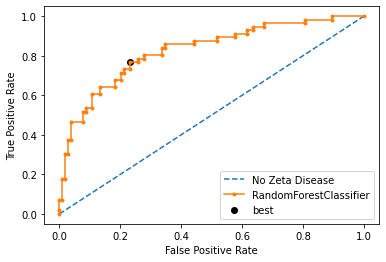

In [54]:
# G-Mean Score

X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

#model=RandomForestClassifier(n_estimators=500,random_state=0)
model=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
model.fit(X_train,y_train)
yhat=model.predict_proba(X_test)
yhat=yhat[:,1]
fpr,tpr,thresholds=roc_curve(y_test,yhat)
gmeans=sqrt(tpr*(1-fpr))
ix=argmax(gmeans)

print("Best Threshold=%f, G-Mean=%.3f" % (thresholds[ix],gmeans[ix]))

plt.plot([0,1],[0,1],linestyle='--',label='No Zeta Disease')
plt.plot(fpr,tpr,marker='.',label='RandomForestClassifier')
plt.scatter(fpr[ix],tpr[ix],marker='o',color='black',label='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [55]:
# Youden's J statistic
model=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
model.fit(X_train,y_train)
yhat=model.predict_proba(X_test)
yhat=yhat[:,1]
fpr,tpr,thresholds=roc_curve(y_test,yhat)
J=tpr-fpr
ix=argmax(J)
best_thresh=thresholds[ix]
print ('Random Forest model Best Threshold=%f' %(best_thresh))

Random Forest model Best Threshold=0.375039


In [56]:
X = df_train.drop(['zeta_disease'], axis=1)
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

threshold=0.375
model=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
model.fit(X_train,y_train)

print_score("Random Forest with Adjusted Threshold",model,X_test,y_test,threshold,threshold_aj=True)

Test Result: Random Forest with Adjusted Threshold 
Accuracy Score: 76.88%
_______________________________________________
Roc_Auc_Score:
76.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.860215   0.641791   0.76875    0.751003      0.783767
recall       0.769231   0.767857   0.76875    0.768544      0.768750
f1-score     0.812183   0.699187   0.76875    0.755685      0.772634
support    104.000000  56.000000   0.76875  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[80 24]
 [13 43]]



In [75]:
log_clf_tune = Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ('classifier', LogisticRegression(solver='liblinear',penalty='l2',C=21.54))])

log_clf_tune.fit(X_train, y_train)

print_score("Logistic Regression with Adjusted Threshold",log_clf_tune, X_test, y_test,threshold,threshold_aj=True)

Test Result: Logistic Regression with Adjusted Threshold 
Accuracy Score: 75.00%
_______________________________________________
Roc_Auc_Score:
72.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.813725   0.637931      0.75    0.725828      0.752197
recall       0.798077   0.660714      0.75    0.729396      0.750000
f1-score     0.805825   0.649123      0.75    0.727474      0.750979
support    104.000000  56.000000      0.75  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[83 21]
 [19 37]]



In [58]:
svm_clf_tune=Pipeline(steps=[('feature_preprocess', feature_preprocess),
 ("svm",SVC(kernel='linear', gamma=0.001, C=20,probability=True))])

svm_clf_tune.fit(X_train, y_train)

print_score("SVM with Adjusted Threshold",svm_clf_tune, X_test, y_test,threshold,threshold_aj=True)

Test Result: SVM with Adjusted Threshold 
Accuracy Score: 73.75%
_______________________________________________
Roc_Auc_Score:
71.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.803922   0.620690    0.7375    0.712306      0.739790
recall       0.788462   0.642857    0.7375    0.715659      0.737500
f1-score     0.796117   0.631579    0.7375    0.713848      0.738528
support    104.000000  56.000000    0.7375  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[82 22]
 [20 36]]



###### By comparing the ROC AUC score from two different approachs & three different models, the method providing highest ROC AUC score is the tuned random forest with threshold 0.375

# Feature Engineering

###### Based on random forest and logit summary, important features are weight, bmi, age, liver_stress_test, and insulin_test, experiment on the important features with random forest to see if this improve the model performance

In [59]:
X = df_train[['weight', 'bmi', 'age', 'liver_stress_test', 'insulin_test']]
y = df_train['zeta_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

threshold=0.375
model=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
model.fit(X_train,y_train)

print_score("Random Forest with Adjusted Threshold",model,X_test,y_test,threshold,threshold_aj=True)

Test Result: Random Forest with Adjusted Threshold 
Accuracy Score: 73.12%
_______________________________________________
Roc_Auc_Score:
71.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.814433   0.603175   0.73125    0.708804      0.740493
recall       0.759615   0.678571   0.73125    0.719093      0.731250
f1-score     0.786070   0.638655   0.73125    0.712363      0.734475
support    104.000000  56.000000   0.73125  160.000000    160.000000
_______________________________________________
Confusion Matrix: 
 [[79 25]
 [18 38]]



##### The model performance on testing dataset doesn't improve by training on important features. The whole dataset is still preferred during the model training

# Prediction on Testing Dataset

In [60]:
df_test=pd.read_csv("2021-01-21_zeta-disease_prediction-data_take-home-challenge-test.csv")
df_test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20 non-null     int64  
 1   weight              20 non-null     int64  
 2   bmi                 20 non-null     float64
 3   blood_pressure      20 non-null     int64  
 4   insulin_test        20 non-null     int64  
 5   liver_stress_test   20 non-null     float64
 6   cardio_stress_test  20 non-null     int64  
 7   years_smoking       20 non-null     int64  
 8   zeta_disease        0 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


In [62]:
df_test.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000,NaN
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311,NaN
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000,NaN
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000,NaN
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000,NaN
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000,NaN
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000,NaN


In [63]:
# Fit the model 

X_train = df_train.drop(['zeta_disease'], axis=1)
y_train = df_train['zeta_disease']
X_test = df_test.drop(['zeta_disease'],axis=1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

threshold=0.375
rf_model=RandomForestClassifier(min_samples_leaf=4, n_estimators=700,min_samples_split=2,random_state=0)
rf_model.fit(X_train,y_train)

predicted_prob = rf_model.predict_proba(X_test)
pred=(predicted_prob[:,1]>=threshold).astype('int')

In [64]:
print(pred)

[0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1]


In [65]:
prediction = pd.DataFrame(pred, columns=['zeta_disease_predictions']).to_csv('zeta_disease_prediction.csv')

In [66]:
# Save Model
with open('rf_model_pkl', 'wb') as files:
    pickle.dump(rf_model, files)